## Classification Homework

In [164]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [167]:
df = pd.read_csv("data/housing.csv")

In [168]:
cols = [
    "latitude","longitude","housing_median_age","total_rooms","total_bedrooms",
    "population","households","median_income","median_house_value","ocean_proximity"       
]

### Data Preparation

In [128]:
# Selecting only features from cols
df = df[cols]

# Fill the missing values with 0
df = df.fillna(0,axis=0)

# Create a new column "rooms_per_household" by dividing "total_rooms" by the columns "households"
df["rooms_per_household"] = df["total_rooms"] / df["households"]

# Creta a new column "bedrooms_per_room" by dividing the column "total_bedrooms" by the columns "total_rooms"
df["bedrooms_per_room"] = df["total_bedrooms"] / df["total_rooms"]

# Create a new column "population_per_household" by dividing the column "population" by the column "households"
df["population_per_household"] = df["population"] / df["households"]

## Question 1
What is the most frequent observation (mode) for the column `ocean_proximity`?

In [129]:
df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Ans: <1H OCEAN

## Question 2

* Create the correlation matrix for the numerical features of your train dataset.
    * In a correlation matrix, you compute the correlation coefficient between every pair of features in the datset.
* What are the two features that have the biggest correlation in this dataset?

In [130]:
df.corr().T

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
latitude,1.000000,-0.924664,0.011173,-0.036100,-0.065318,-0.108785,-0.071035,-0.079809,-0.144160,0.106389,-0.104112,0.002366
longitude,-0.924664,1.000000,-0.108197,0.044568,0.068082,0.099773,0.055310,-0.015176,-0.045967,-0.027540,0.084836,0.002476
housing_median_age,0.011173,-0.108197,1.000000,-0.361262,-0.317063,-0.296244,-0.302916,-0.119034,0.105623,-0.153277,0.125396,0.013191
total_rooms,-0.036100,0.044568,-0.361262,1.000000,0.920196,0.857126,0.918484,0.198050,0.134153,0.133798,-0.174583,-0.024581
total_bedrooms,-0.065318,0.068082,-0.317063,0.920196,1.000000,0.866266,0.966507,-0.007295,0.049148,0.002717,0.122205,-0.028019
population,-0.108785,0.099773,-0.296244,0.857126,0.866266,1.000000,0.907222,0.004834,-0.024650,-0.072213,0.031397,0.069863
households,-0.071035,0.055310,-0.302916,0.918484,0.966507,0.907222,1.000000,0.013033,0.065843,-0.080598,0.059818,-0.027309
median_income,-0.079809,-0.015176,-0.119034,0.198050,-0.007295,0.004834,0.013033,1.000000,0.688075,0.326895,-0.573836,0.018766
median_house_value,-0.144160,-0.045967,0.105623,0.134153,0.049148,-0.024650,0.065843,0.688075,1.000000,0.151948,-0.238759,-0.023737
rooms_per_household,0.106389,-0.027540,-0.153277,0.133798,0.002717,-0.072213,-0.080598,0.326895,0.151948,1.000000,-0.387465,-0.004852


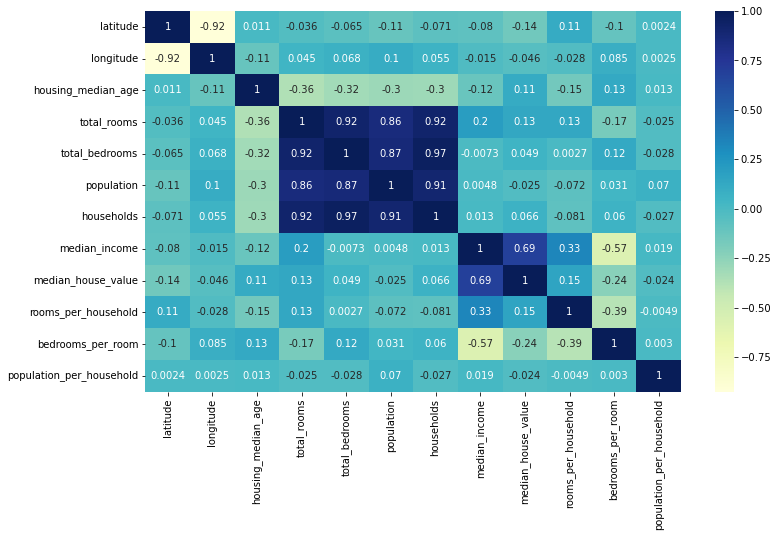

In [131]:
plt.figure(figsize=(12,7))
sns.heatmap(data=df.corr(),annot=True,cmap="YlGnBu");

Ans: `total_bedrooms` and `households`

## Make the `median_house_value` binary

In [132]:
avg = df["median_house_value"].mean()

In [133]:
df["median_house_value"]= (df.median_house_value > avg).astype(int)

## Split the data
* Split the data in train/val/test sets, with 60%/20%/20% distribution
* Use seed as 42
* Make sure that the target value is not in our dataframe

In [134]:
y = df["median_house_value"]

In [136]:
20/80

0.25

In [137]:
from sklearn.model_selection import train_test_split
# Into Train and test set
X_full,X_test,y_full,y_test = train_test_split(df,y,test_size=0.2,random_state=42)

# Into Train and cross val test
X_train,X_val,y_train,y_val  = train_test_split(X_full,y_full,test_size=0.25,random_state=42)

In [138]:
y_train.values

array([1, 1, 0, ..., 1, 0, 0])

## Question 3
* Calculate the mutual information score with (binarized) price for the categorical variable that we have. Use the training set only.
* What is the value of mutual information?
* Round it to 2 decimal digits

In [139]:
cat_col = list(X_train.select_dtypes(include="object"))
cat_col

['ocean_proximity']

In [140]:
from sklearn.metrics import mutual_info_score

In [141]:
def calculate_mi(series):
    return mutual_info_score(series,y_train)

df_mi = X_train[cat_col].apply(calculate_mi)
print(f"The mutual info score is {np.round(df_mi,2)}")

The mutual info score is ocean_proximity    0.1
dtype: float64


## Question 4


In [142]:
# one-hot encoding
encoder_X_train=pd.get_dummies(X_train[cat_col],drop_first=True)
encoder_X_test=pd.get_dummies(X_test[cat_col],drop_first=True)
encoder_X_val=pd.get_dummies(X_val[cat_col],drop_first=True)

In [143]:
# concating
X_train = pd.concat([X_train,encoder_X_train],axis='columns')
X_test = pd.concat([X_test,encoder_X_test],axis='columns')
X_val = pd.concat([X_val,encoder_X_val],axis='columns')
# dropping
del X_train["ocean_proximity"]
del X_test["ocean_proximity"]
del X_val["ocean_proximity"]

In [144]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(solver="liblinear",C=1.0,max_iter=1000,random_state=42)
lr_model.fit(X_train,y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [147]:
y_pred = lr_model.predict_proba(X_val)[:,1]

In [154]:
y_pred

array([0.08115477, 0.17761561, 0.95191047, ..., 0.96150557, 0.85140406,
       0.45788234])

In [155]:
median_price = y_pred > 0.5

In [157]:
np.round((y_val == median_price).mean(),2)

0.84

## Question 5

In [160]:
dict(zip(df.columns,lr_model.coef_[0].round(3)))

{'latitude': 0.115,
 'longitude': 0.083,
 'housing_median_age': 0.036,
 'total_rooms': -0.0,
 'total_bedrooms': 0.002,
 'population': -0.002,
 'households': 0.004,
 'median_income': 1.209,
 'ocean_proximity': -0.017,
 'rooms_per_household': 0.39,
 'bedrooms_per_room': 0.01,
 'population_per_household': -2.155}

Didnot understand question

## Question 6

In [196]:
X = df[cols]
X = X.fillna(0,axis=0)
y = np.log1p(df["median_house_value"])
del X["median_house_value"]

In [197]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [198]:
# one-hot encoding
encoder_X_train=pd.get_dummies(X_train[cat_col],drop_first=True)
encoder_X_test=pd.get_dummies(X_test[cat_col],drop_first=True)

# concating
X_train = pd.concat([X_train,encoder_X_train],axis='columns')
X_test = pd.concat([X_test,encoder_X_test],axis='columns')



In [199]:
# dropping
del X_train["ocean_proximity"]
del X_test["ocean_proximity"]

In [203]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
alpha = [0, 0.01, 0.1, 1, 10]
for a in alpha:
    model = Ridge(alpha = a,solver="sag",random_state=42)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    rmse = np.round(np.sqrt(mean_absolute_error(y_test,y_pred)),3)
    print((a,rmse))
    


(0, 0.185)
(0.01, 0.185)
(0.1, 0.185)
(1, 0.185)
(10, 0.185)
